# Desafío - Regresión desde la econometría

## Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre
su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:
<li><code>Income</code>: Ingreso anual disponible en miles de dólares.</li>
<li><code>Limit</code>: Límite del crédito.</li>
<li><code>Rating</code>: Ranking del crédito.</li>
<li><code>Cards</code>: Cantidad de tarjetas de crédito.</li>
<li><code>Age</code>: Edad del usuario.</li>
<li><code>Education</code>: Años de educación del usuario.</li>
<li><code>Gender</code>: ¿Hombre o mujer?</li>
<li><code>Student</code>: ¿Es estudiante?</li>
<li><code>Married</code>: ¿Está casado?</li>
<li><code>Ethnicity</code>: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)</li>
<li><code>Balance</code>: Promedio de deuda en tarjeta de crédito de usuario.</li>
</br>
</br>
Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la
variación en el promedio de deuda en tarjeta de crédito.
</br>
</br>
A lo largo del desafío generamos modelos econométricos para inspeccionar los efectos de
distintos atributos.


## Desafío 1: Prepare el ambiente de trabajo

<li>Importe las librerías básicas para el análisis de datos.</li>
<li>Incluya los import base de <code>statsmodels</code>.</li>
<li>Importe la base de datos <code>Credit.csv</code> y elimine la columna <code>Unnamed: 0</code>.</li>
<li>Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del
grupo minoritario en cada variable. Para el caso de <code>Ethnicity</code>, genere binarias para
<code>African</code> <code>American</code>, <code>Caucasian</code> y <code>Asian</code>.
<ul><li>
<b>tip:</b> Utilice <code>value_counts()</code> para revisar la cantidad de casos en las variables
categóricas.</li></ul></li>


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

In [114]:
df = pd.read_csv('./Credit.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [115]:
ohe = pd.get_dummies(df['Ethnicity'])
newDf = df.copy().join(ohe, lsuffix='_caller', rsuffix='_ohe')
newDf.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1


##  Desafío 2: Genere gráficos descriptivos para las variables continuas

<li>Genere una función llamada <code>plot_hist</code> que genere un histograma de la variable e
indique la media y mediana de la misma. Agregue una leyenda para indicar qué
representa cada línea.</li>
<li>¿Cuál es el comportamiento de <code>Balance</code>, <code>Income</code>, <code>Cards</code> y <code>Rating</code>?</li>


In [116]:
def plot_hist(df, variable):
    varCol = df[variable].dropna()
    plt.hist(varCol, color="gray", alpha=.6)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.axvline(varCol.mean())
    plt.text(varCol.mean(), 10,'Mean',rotation=90)
    plt.axvline(np.median(varCol), color='tomato')
    plt.text(np.median(varCol), 50,'Median',rotation=90)

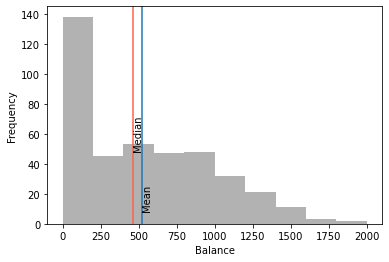

In [117]:
plot_hist(newDf, 'Balance')

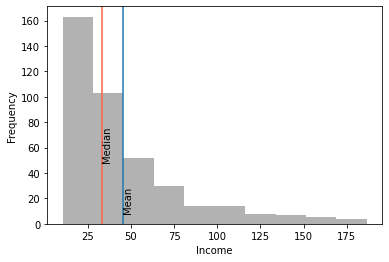

In [118]:
plot_hist(newDf, 'Income')

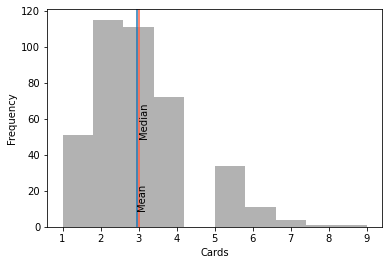

In [119]:
plot_hist(newDf, 'Cards')

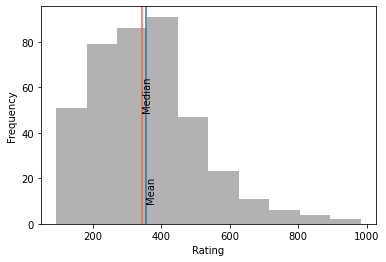

In [120]:
plot_hist(newDf, 'Rating')

## Desafío 3: Regresión Lineal Simple
<li>A continuación generaremos una serie de modelos simples:</li>

$$
Balance = \beta_0 + \gamma_1 \cdot Student + \varepsilon
$$

$$
Balance = \beta_0 + \beta_1 \cdot Income + \varepsilon
$$

$$
Balance = \beta_0 + \beta_1 \cdot Rating + \varepsilon
$$

<li>Utilizando <code>statsmodels</code>, comente brevemente los siguientes puntos:
<ul>
<li>¿Qué variable presenta un mayor poder explicativo de la variabilidad de
<code>Balance</code>?</li>
<li>¿Qué podemos decir sobre el comportamiento de <code>Student</code>?
<ul>
<li>
¿Qué pasa si aplicamos una prueba de hipotesis para muestras
independientes de <code>Balance</code> entre aquellos que son y no son
estudiantes?</li></ul></li></ul></li>

In [121]:
model = smf.ols('Balance ~ Student', newDf)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.49e-07
Time:                        18:26:18   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
model2 = smf.ols('Balance ~ Income', newDf)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.03e-22
Time:                        18:26:18   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
model3 = smf.ols('Balance ~ Rating', newDf)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.90e-120
Time:                        18:26:18   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<li>¿Qué variable presenta un mayor poder explicativo de la variabilidad de <code>Balance</code>?</li>
</br>
<b>R: </b>La variable que mas poder explicativo tiene es <code>Rating</code> que explica la variabilidad para un ~75% de la muestra. Confirmando lo anterior se puede observar un Prob(F-statistic) muy pequeño

$$Prob(F-statistic) \approx 2e^{-120}$$

Lo que da una confianza aún mas alta al modelo.

<li>¿Qué podemos decir sobre el comportamiento de <code>Student</code>?
</br></br>

<b>R: </b> La variable <code>Student</code> tiene un $R^2$ bajo que sólo explica la variabilidad con un ~7%, también se observa que el error de los coeficientes generados son bastante altos.
<ul>
<li>
¿Qué pasa si aplicamos una prueba de hipotesis para muestras
independientes de <code>Balance</code> entre aquellos que son y no son
estudiantes?</li></ul>

<b>R: </b> Si hicieramos una prueba de hipotesis independientes entre ambas muestras de balance, nos daría un p-value igual al Prob(F-statistic), lo que da $1.49\cdot e^{-7}$, lo que significa rechazar la hipótesis nula con una confianza >99%.
</li></ul></li>




In [124]:
students = newDf[newDf['Student'] == 'Yes']['Balance']
notStudents = newDf[newDf['Student'] == 'No']['Balance']
stats.ttest_ind(students, notStudents)

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

## Desafío 4: Generar un modelo que incluya todos los regresores

$$
Balance_i = \beta_0 + \sum_{j=1}^{N} \beta_j \cdot X_{ij} + \epsilon_i
$$

<li>Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales
características de los predictores.</li>

In [125]:
newDf.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'African American',
       'Asian', 'Caucasian'],
      dtype='object')

In [126]:

model3 = smf.ols('Balance ~ Income + Rating + Student + Limit + Cards + Age + Education + Gender + Married + Asian + Caucasian + Q("African American")', newDf)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.11e-253
Time:                        18:26:18   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -352.6781     25.846    -13.646      0.000    -403.493    -301.863
Student[T.Yes]          425.7474     16.723     25.459      0.000     392.869     458.626
Gender[T.Female]        -10.6532      9.914     -1.075      0.283     -30.145       8.839
Married[T.Yes]           -8.5339     10.363     -0.824      0.411     -28.908      11.841
Income                   -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Rating                    1.1365      0.491      2.315      0.021       0.171       2.102
Limit                     0.1909      0.033      5.824      0.000       0.126       0.255
Cards                    17.7245      4.341      4.083      0.000       9.190      26.259
Age                      -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                -1.0989      1.598     -0.688      0.492      -4.241       2.043
Asian                  -109.7256     11.552     -9.498      0.000    -132.438     -87.013
Caucasian              -116.4227     10.547    -11.038      0.000    -137.159     -95.686
Q("African American")  -126.5298     11.963    -10.577      0.000    -150.049    -103.010
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     2.71e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Notamos que el modelo es bastante bueno, pues tiene un $R^2$ que explica la variabilidad con un ~95%. Notamos también que para las columnas con variables Discretas son aquellas con p valor alto, no así para <code>Student</code>

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo

<li>En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder explicativo en la
varianza de 𝑦 y las principales características de los predictores.</li>
<li>¿Mejoró o empeoró el modelo con la reducción de regresores?</li>

In [127]:
model3.pvalues


Intercept                 6.671942e-35
Student[T.Yes]            8.854521e-85
Gender[T.Female]          2.832368e-01
Married[T.Yes]            4.107256e-01
Income                   7.372312e-116
Rating                    2.112213e-02
Limit                     1.205974e-08
Cards                     5.401200e-05
Age                       3.743127e-02
Education                 4.920746e-01
Asian                     2.239081e-19
Caucasian                 8.031960e-25
Q("African American")     3.826975e-23
dtype: float64

In [128]:
# Se eliminan Gender, Married, Age y Education
model4 = smf.ols('Balance ~ Income + Rating + Student + Limit + Cards + Asian + Caucasian + Q("African American")', newDf)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          2.79e-258
Time:                        18:26:19   Log-Likelihood:                -2402.1
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     392   BIC:                             4852.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -395.6995     14.869    -26.612      0.000    -424.933    -366.466
Student[T.Yes]          426.2979     16.616     25.656      0.000     393.631     458.965
Income                   -7.8735      0.232    -33.981      0.000      -8.329      -7.418
Rating                    1.1147      0.488      2.283      0.023       0.155       2.075
Limit                     0.1927      0.033      5.910      0.000       0.129       0.257
Cards                    17.7089      4.342      4.079      0.000       9.173      26.245
Asian                  -124.0494      9.111    -13.616      0.000    -141.961    -106.138
Caucasian              -130.6140      8.010    -16.306      0.000    -146.363    -114.865
Q("African American")  -141.0360      9.521    -14.813      0.000    -159.755    -122.317
==============================================================================
Omnibus:                       31.057   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.291
Skew:                           0.730   Prob(JB):                     1.32e-08
Kurtosis:                       3.211   Cond. No.                     1.80e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Según lo obtenido, podemos inferir que el modelo mejoró, debido a que su P(F-statistic) disminuyó, lo que significa que la confianza con la que podemos decir que <b>"El modelo no representa la variabilidad de la muestra"</b>(hipótesis nula) es mayor.

## Desafío 6
<li>Utilizando <code>lmplot</code> de <code>seaborn</code>, inspeccione el comportamiento de los tres
principales determinantes.</li>


In [129]:
model4.pvalues


Intercept                 7.188628e-90
Student[T.Yes]            6.567358e-86
Income                   6.708969e-119
Rating                    2.299032e-02
Limit                     7.445071e-09
Cards                     5.482448e-05
Asian                     7.681650e-35
Caucasian                 5.347942e-46
Q("African American")     9.695544e-40
dtype: float64

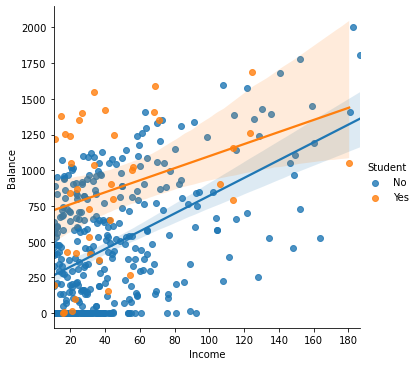

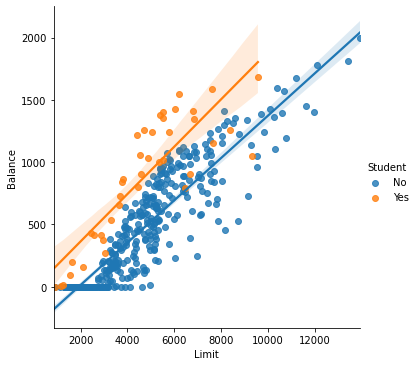

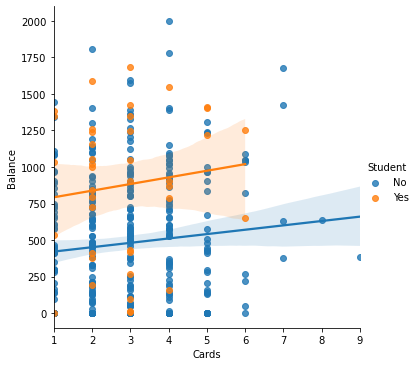

In [130]:
# Sin considerar las variables binarias de Etnicidad, ni Student. las 3 mejores variables son Income, Limit y Cards
sns.lmplot(x="Income",y="Balance",data =newDf.dropna(), hue="Student")
sns.lmplot(x="Limit",y="Balance",data =newDf.dropna(), hue="Student")
sns.lmplot(x="Cards",y="Balance",data =newDf.dropna(), hue="Student")

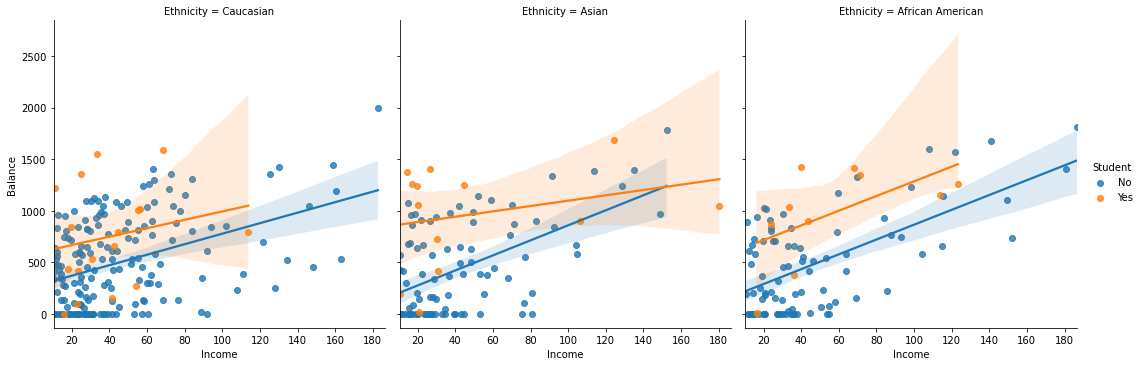

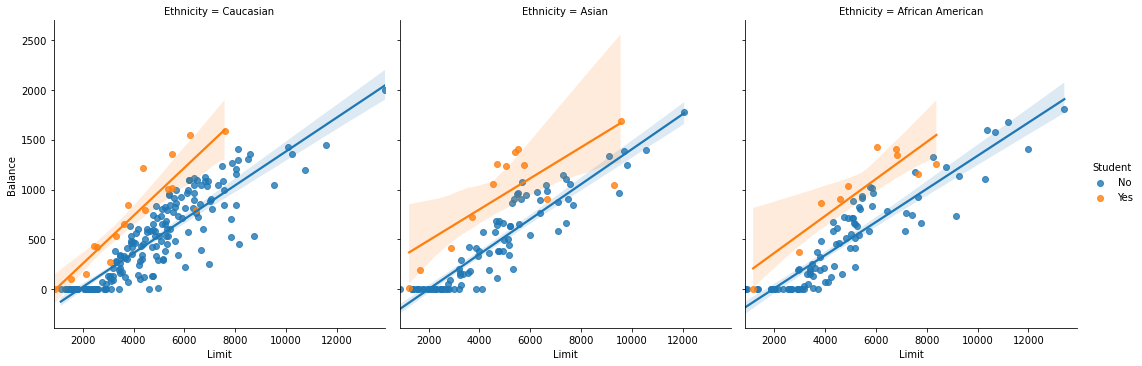

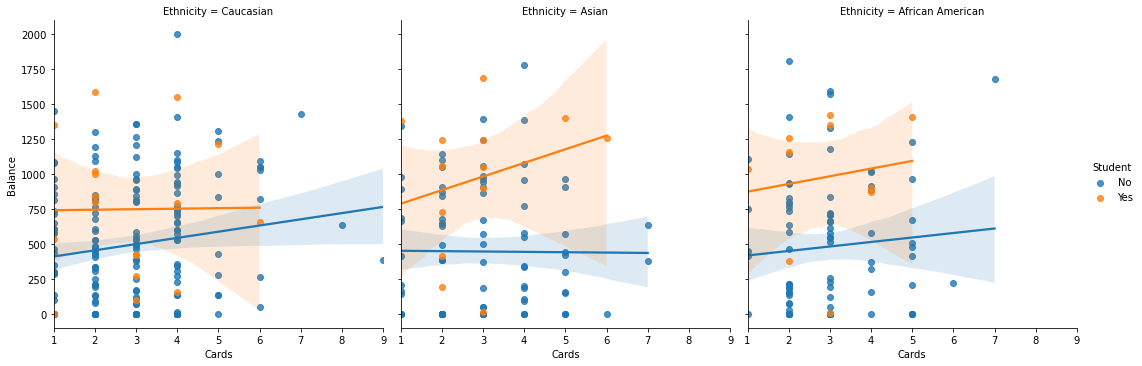

In [131]:
# También las estratificadas segun etnicidad.
sns.lmplot(x="Income",y="Balance",data =newDf.dropna(), hue="Student", col="Ethnicity")
sns.lmplot(x="Limit",y="Balance",data =newDf.dropna(), hue="Student", col="Ethnicity")
sns.lmplot(x="Cards",y="Balance",data =newDf.dropna(), hue="Student", col="Ethnicity")